<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 30px; font-weight: bold; font-family: Helvetica">
Lab8: การจัดกลุ่มข้อมูลด้วย K-mean (K-mean Clustering)</h1>
</div>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">เครื่องมือที่จะใช้ใน Lab นี้:</h1>

In [47]:
# นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import numpy as np
# นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import matplotlib.pyplot as plt
# นำเข้าไลบรารี matplotlib.dates โดยตั้งชื่อว่า mdates
import pandas as pd
# นำเข้าไลบรารี seaborn โดยตั้งชื่อว่า sns
import seaborn as sns
# ปิดการแจ้งเตือน
import warnings
warnings.filterwarnings('ignore')

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

<h1 style="font-size: 18px;">1.1 นำข้อมูลเข้า</h1>

In [48]:
data = pd.read_csv("IRIS.csv") # อ่านไฟล์ csv ชื่อ 'IRIS.csv' เราจะได้ตารางของข้อมูล (dataframe) เก็บไว้ในตัวแปรชื่อ data
data.head() # แสดงผล dataframe 5 แถวแรก

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1 style="font-size: 18px;">1.2 สำรวจข้อมูล</h1>

In [49]:
data.info() # แสดงรายละเอียดของแต่ละคอลัมน์ใน data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [50]:
data.describe() # แสดงสถิติเบื้องต้นของแต่ละคอลัมน์ใน dataframe

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
data.species.value_counts() # แสดงจำนวนข้อมูลในแต่ละคลาส

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

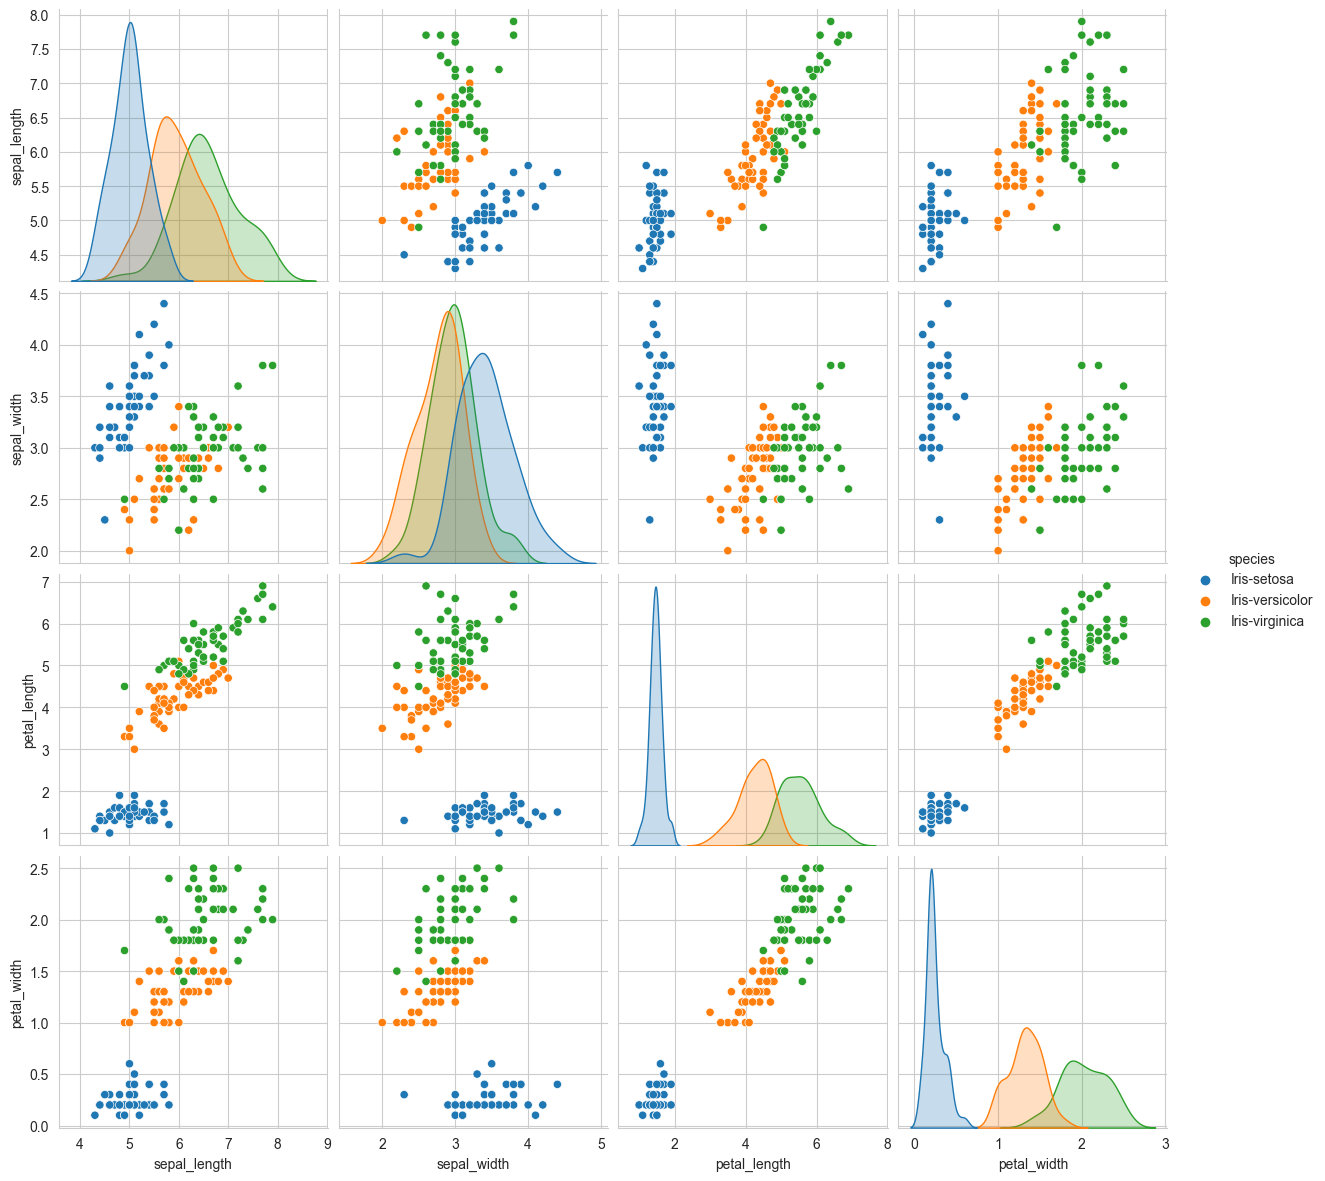

In [52]:
# แสดง Pairplot
sns.set_style("whitegrid")
sns.pairplot(data,hue="species",size=3)
plt.show()

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">2. ปรับช่วงของข้อมูล (Feature Scaling) และ ลดมิติของข้อมูล (Dimensionality Reduction)</h1>

In [53]:
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ StandardScaler
from sklearn.preprocessing import StandardScaler
# นำเข้าไลบรารี sklearn.decomposition เพื่อเรียกใช้ PCA
from sklearn.decomposition import PCA

<h1 style="font-size: 18px;">2.1 ปรับช่วงของข้อมูล (Feature Scaling)</h1>

In [54]:
# นำฟังก์ชัน StandardScaler() เก็บไว้ในตัวแปร scaler
scaler = StandardScaler()

In [55]:
X = data.iloc[:, :-1].values # นำส่วนของค่า Features เก็บไว้ใน array X
X[:5] # แสดงผลชองตัวแปร X 5 index แรก

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [56]:
X_scaled = scaler.fit_transform(X) # ปรับช่วงของ Features ทั้งหมด
X_scaled[:5]  # แสดงผลชองตัวแปร X_scaled 5 index แรก

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

<h1 style="font-size: 18px;">2.2 ลดมิติของข้อมูล (Dimensionality Reduction)</h1>

In [57]:
# ลดมิติของข้อมูลเป็น 2 มิติ
pca = PCA(n_components = 2)
pca = pca.fit_transform(X_scaled)
pca[:5]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">3. หาค่า K ที่เหมาะสมที่สุดในการทำ K-mean Clustering</h1>

สามารถหาได้ด้วยการทำ "Elbow method" โดยมีวิธีการดังนี้

#### 1. คำนวณคลัสเตอร์ริ่ง

- ทำการคลัสเตอร์ริ่งด้วยค่า $k$ ที่แตกต่างกัน โดยทั่วไปเริ่มต้นที่ 1 และเพิ่มขึ้นทีละ 1 จนถึงค่าที่ต้องการ หรือจนกระทั่งเราเห็นลักษณะ "Elbow"

#### 2. คำนวณค่า WCSS

- สำหรับแต่ละค่า $k$, คำนวณค่า Within-Cluster Sum of Squares (WCSS) ซึ่งเป็นผลรวมของระยะทางกำลังสองระหว่างจุดข้อมูลแต่ละจุดกับศูนย์กลางคลัสเตอร์ที่มันถูกกำหนดให้

$$ \text{WCSS} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} \left\| x_{ij} - \mu_i \right\|^2 $$

โดยที่:
- $k$ คือ จำนวนคลัสเตอร์
- $n_i$ คือ จำนวนจุดข้อมูลในคลัสเตอร์ที่ $i$
- $x_{ij}$ คือ จุดข้อมูลที่ $j$ ในคลัสเตอร์ที่ $i$
- $\mu_i$ คือ ศูนย์กลางคลัสเตอร์ที่ $i$

#### 3. หา "Elbow"

- พล็อตกราฟของค่า $k$ ต่อกับ WCSS
- จุด "Elbow" คือจุดที่ WCSS ลดลงและโค้งเปลี่ยนทิศทางอย่างชัดเจน จุดนั้นถือว่าเป็นจำนวนคลัสเตอร์ที่เหมาะสม


In [58]:
# นำเข้าไลบรารี sklearn.cluster เพื่อเรียกใช้ KMeans
from sklearn.cluster import KMeans 

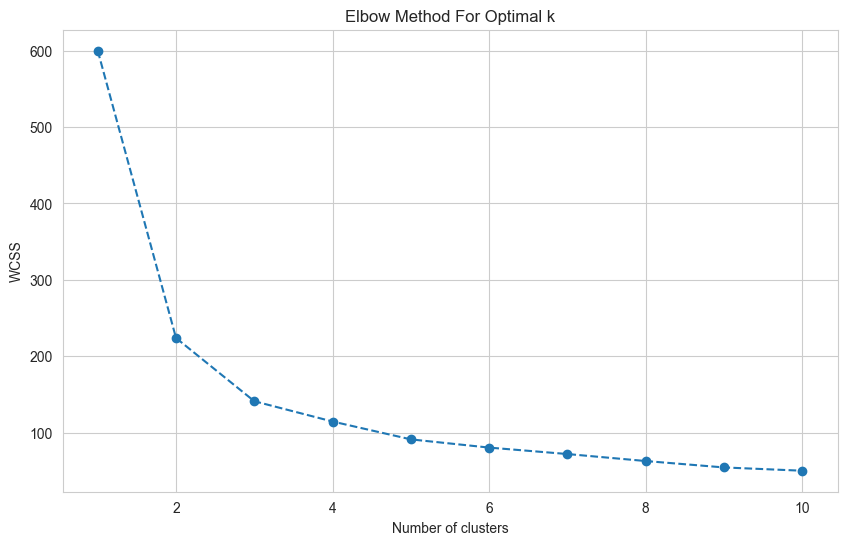

In [59]:
# สร้าง list ไว้เก็บค่า Within-Cluster Sum of Squares (WCSS) 
wcss = [] 

# ทำ Elbow method
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# พลอตค่า Within-Cluster Sum of Squares (WCSS) ในแต่ละรอบ
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', label='WCSS')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

เราจะเลือกค่า K ที่เหมาะสมที่สุดจากค่า WCSS บนกราฟด้านบน ซึ่งในที่นี้จะได้ค่า K = 3 เนื่องจากค่า WCSS ในรอบที่ 3 มีลักษณะเป็นข้อศอก คือ มีการลดลงของค่า WCSS น้อยลง เทียบกับรอบที่ 1,2 และอย่างที่เราทราบกันดีว่าชุดข้อมูลนี้มี 3 คลาสอยู่แล้ว นั่นจึงบ่งบอกได้ว่าวิธีการเลือกค่า K ด้วย Elbow method นั้นสอดคล้องกับชุดข้อมูลนี้

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">4. จัดกลุ่มข้อมูลด้วย K-mean Clustering</h1>

In [60]:
# สร้างโมเดล K-means
kmeans = KMeans(n_clusters=3, random_state=42)
# fit โมเดลด้วย training data
kmeans.fit(pca)

KMeans(n_clusters=3, random_state=42)

In [61]:
# เรียกดูตำแหน่งของแต่ละ centroid
centroids_pca = kmeans.cluster_centers_
centroids_pca

array([[ 0.56713803, -0.8076751 ],
       [-2.22019328,  0.29222482],
       [ 1.72236912,  0.59990509]])

In [62]:
# นำคลาสที่จัดกลุ่มได้ ใส่เข้าไปใน dataframe
data['cluster'] = kmeans.labels_

In [63]:
data.sample(5) # แสดง dataframe 5 แถวแบบสุ่ม

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
91,6.1,3.0,4.6,1.4,Iris-versicolor,0
72,6.3,2.5,4.9,1.5,Iris-versicolor,0
35,5.0,3.2,1.2,0.2,Iris-setosa,1
14,5.8,4.0,1.2,0.2,Iris-setosa,1
57,4.9,2.4,3.3,1.0,Iris-versicolor,0


In [64]:
# สร้าง dataframe ใหม่ ที่มีการลด features เป็น 2 features
pca_df = pd.DataFrame(pca, columns=['PC1', 'PC2'])
pca_df['species'] = data['species']
pca_df['cluster'] = data['cluster']

In [65]:
# สร้าง colormap
color_mapping = {
    'Iris-setosa': 'purple',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'orange'
}

colors_species = pca_df['species'].map(color_mapping)

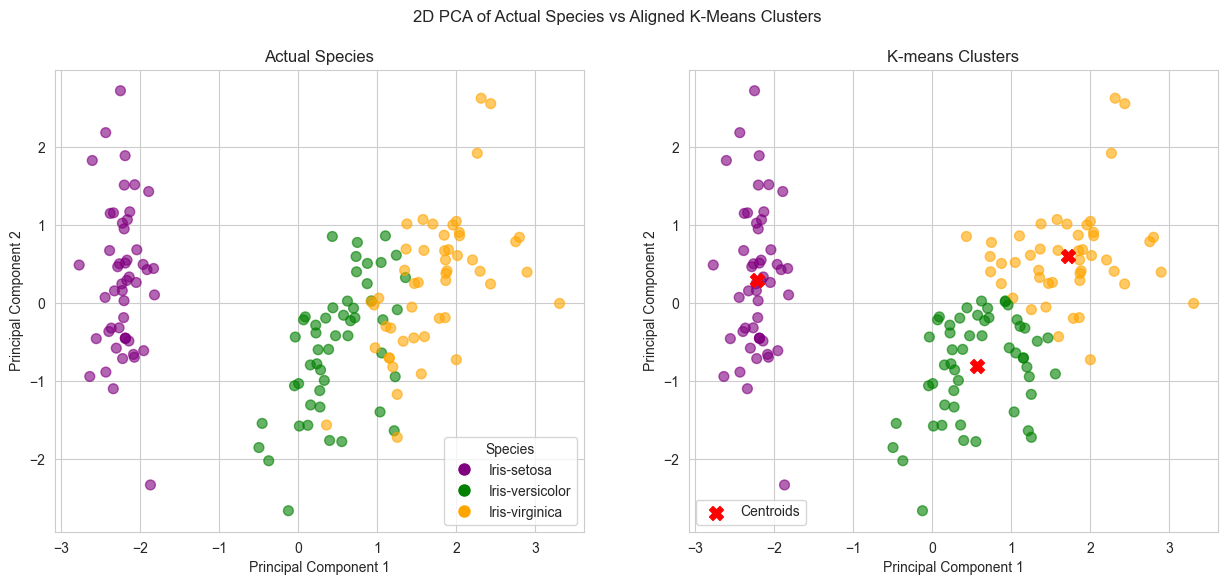

In [66]:
# ค้นหาชนิดที่พบบ่อยที่สุดในแต่ละคลัสเตอร์
cluster_mapping = {}
for cluster_label in data['cluster'].unique():
    # ค้นหาชนิดที่พบบ่อยที่สุดในคลัสเตอร์นี้
    most_common = data[data['cluster'] == cluster_label]['species'].mode().iloc[0]
    # จับคู่คลัสเตอร์กับสีของชนิด
    cluster_mapping[cluster_label] = color_mapping[most_common]

# จับคู่คลัสเตอร์กับสี
colors_cluster = data['cluster'].map(cluster_mapping)

# สร้างพล็อต
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# คลาสจริง
ax[0].scatter(pca_df['PC1'], pca_df['PC2'], c=colors_species, s=50, alpha=0.6)
handles = [plt.Line2D([0], [0], marker='o', color='w', label=species, 
                      markersize=10, markerfacecolor=color) for species, color in color_mapping.items()]
ax[0].legend(handles=handles, title="Species")
ax[0].set_title('Actual Species')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[0].grid(True)

# คลัสเตอร์ k-means พร้อมสีที่จับคู่
ax[1].scatter(pca_df['PC1'], pca_df['PC2'], c=colors_cluster, s=50, alpha=0.6)
ax[1].scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=100, label='Centroids')
ax[1].legend()
ax[1].set_title('K-means Clusters')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
ax[1].grid(True)

plt.suptitle('2D PCA of Actual Species vs Aligned K-Means Clusters')
plt.show()

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">5. วัดผลการจัดกลุ่มข้อมูลด้วย K-mean Clustering</h1>

### คะแนน Silhouette

คะแนน Silhouette ใช้เพื่อวัดประสิทธิภาพของการจัดกลุ่มหรือการทำคลัสเตอร์ ค่าที่ได้จะอยู่ในช่วง -1 ถึง 1 โดยที่ค่าที่ใกล้เคียง 1 หมายความว่าตัวอย่างนั้นๆ ถูกจัดกลุ่มอย่างดี ค่าที่ใกล้เคียง -1 หมายความว่าตัวอย่างนั้นๆ ถูกจัดกลุ่มอย่างไม่ดี และค่าที่ใกล้เคียง 0 หมายความว่าตัวอย่างนั้นๆ อยู่ระหว่างขอบเขตของกลุ่ม

คะแนน Silhouette คำนวณจากสูตร:

$$ s(i) = \frac{b(i) - a(i)}{\max[a(i), b(i)]} $$

โดยที่:
- $ a(i) $ คือค่าเฉลี่ยระยะทางจากตัวอย่างที่ $ i $ ไปยังตัวอย่างอื่น ๆ ในคลัสเตอร์เดียวกัน
- $ b(i) $ คือค่าเฉลี่ยระยะทางจากตัวอย่างที่ $ i $ ไปยังตัวอย่างในคลัสเตอร์ที่ใกล้ที่สุดที่ตัวอย่าง $ i $ ไม่ได้เป็นส่วนหนึ่งของคลัสเตอร์นั้น

ค่า Silhouette ที่สูงทำให้เรารู้ว่าการจัดกลุ่มนั้นดี ในขณะที่ค่าที่ต่ำหรือลบให้เรารู้ว่าตัวอย่างบางตัวอาจจะถูกจัดกลุ่มไม่ถูกต้อง


In [67]:
from sklearn.metrics import silhouette_score

In [68]:
# วัดผลการทำ k-mean clustering
silhouette_avg = silhouette_score(pca, kmeans.labels_)
silhouette_avg

0.5081546339516392